<a href="https://www.kaggle.com/code/pttljessy/eda-players-dataset?scriptVersionId=148643292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Table of Contents**
**Step 1: Importing necessary libraries and packages**

**Step 2: Understanding data**

**Step 3: Cleaning data (Check, visualise, and handle missing/null values)**

**Step 4: Asking analytical questions and visualisations**

Examples:
*  What are the most common characteristics of players (count the one with highest occurences)
*  What is the most common officialPosition?
*  Is there a relationship between officialPosition and age, height, weight, collegeName? 

**Step 5: Insights summary and conclusion**

![NFL 2023](https://static.www.nfl.com/image/private/t_editorial_landscape_12_desktop/f_auto/league/trrs4gmsu0htixgdyzni.jpg)
Listed by Texas Tech at 6-foot-6 and 275 pounds, edge rusher Tyree Wilson has a similar frame -- and game -- to four-time Pro Bowler and one-time sack king Chandler Jones. (AP photos) (Source: [2023 NFL Draft](https://www.nfl.com/news/2023-nfl-draft-aspirational-pro-player-comps-for-top-senior-bowl-prospects))

# Step 1: Importing necessary libraries and packages

In [1]:
#Importing necessary libraries and packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
# returns current date and time
now = datetime.now()

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [2]:
# Loading the .csv files using Pandas
df_players = pd.read_csv('../input/nfl-big-data-bowl-2023/players.csv')

# Step 2: Understanding data

In [3]:
print(df_players.dtypes)

nflId                int64
height              object
weight               int64
birthDate           object
collegeName         object
officialPosition    object
displayName         object
dtype: object


In [4]:
print('we have ' + str(df_players.shape) + ' rows and columns respectively')

we have (1679, 7) rows and columns respectively


In [5]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nflId             1679 non-null   int64 
 1   height            1679 non-null   object
 2   weight            1679 non-null   int64 
 3   birthDate         1447 non-null   object
 4   collegeName       1455 non-null   object
 5   officialPosition  1679 non-null   object
 6   displayName       1679 non-null   object
dtypes: int64(2), object(5)
memory usage: 91.9+ KB


# Step 3: Cleaning data (Check, visualise, and handle missing/null values)

<AxesSubplot:>

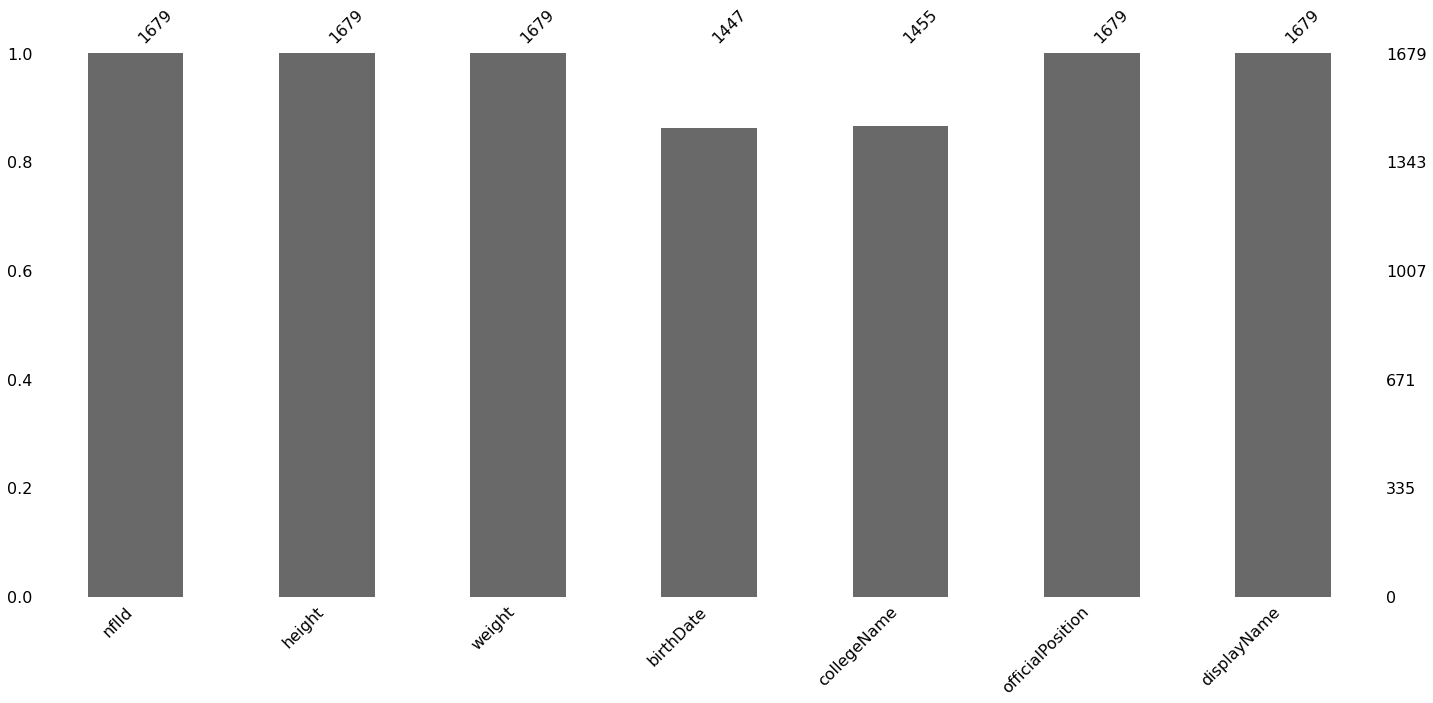

In [6]:
# visualise missing values
msno.bar(df_players)

<AxesSubplot:>

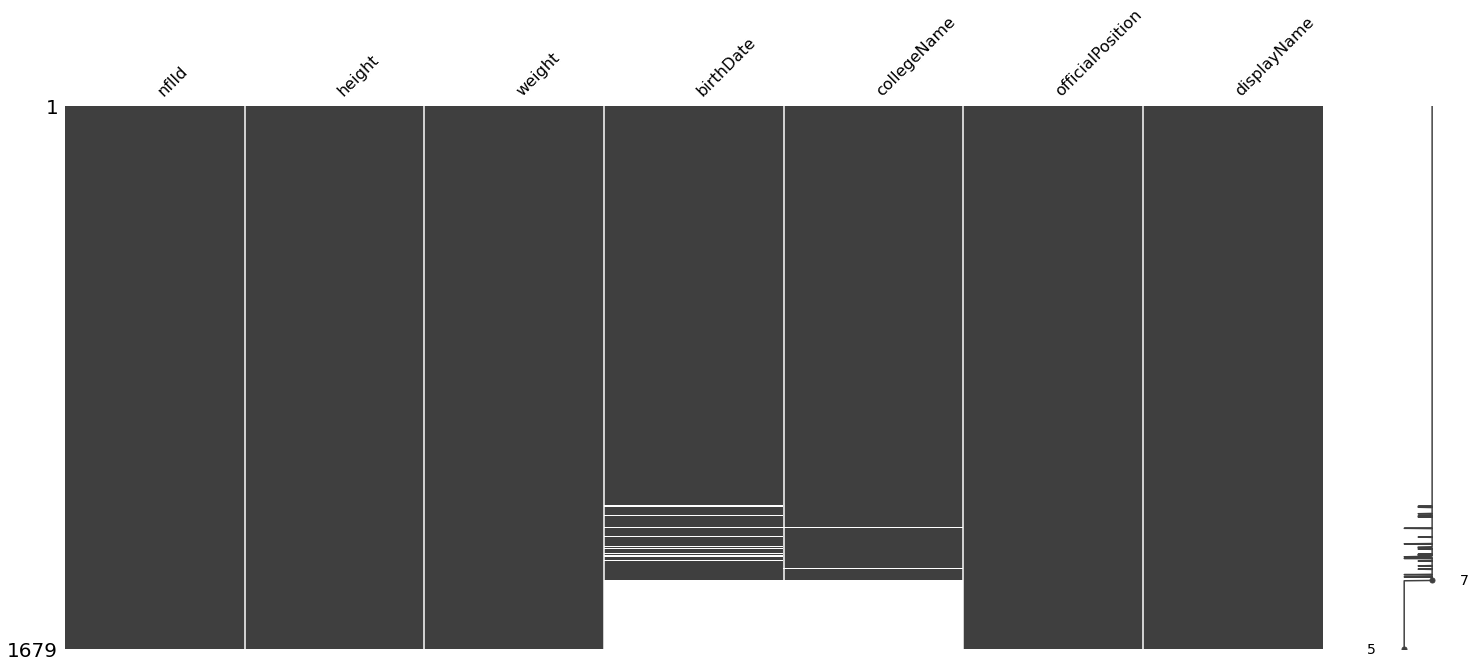

In [7]:
msno.matrix(df_players)

<AxesSubplot:>

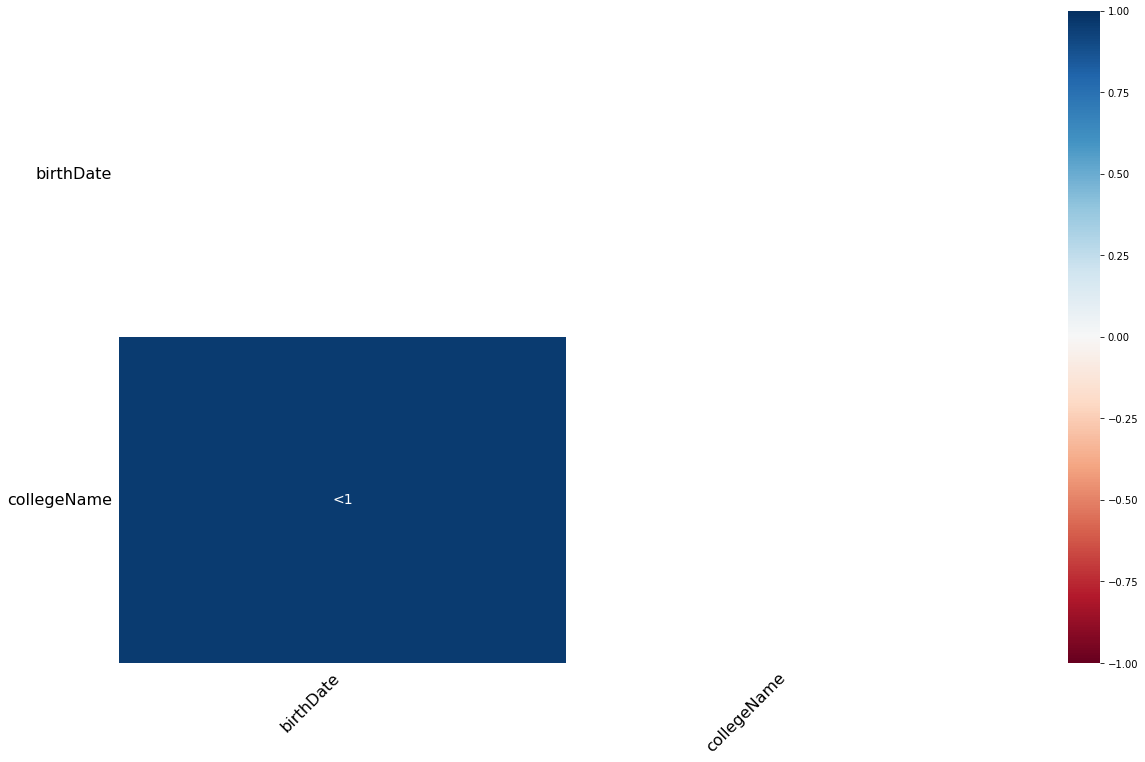

In [8]:
msno.heatmap(df_players)

In [9]:
# Step 1: Understanding data
# The five basic methods are mean, standard deviation, regression, hypothesis testing, and sample size determination.
df_players.describe() #show entire dataframe

,nflId,weight
count,1679.000000,1679.000000
mean,46473.371054,246.182251
std,5041.682488,47.364651
min,25511.000000,158.000000
25%,43295.500000,205.000000
50%,46167.000000,236.000000
75%,52451.500000,292.000000
max,54038.000000,380.000000


In [10]:
# check df
df_players.isnull().values.any() #check if there's any missing values

True

In [11]:
df_players.isnull().sum().sum() #check how many missing values in data in total


456

In [12]:
# Get Information about Missing Values
df_players.isnull().sum() #check how many missing values by variable

nflId                 0
height                0
weight                0
birthDate           232
collegeName         224
officialPosition      0
displayName           0
dtype: int64

In [13]:
df_players.notnull().sum() #check how many non-missing values by variable

nflId               1679
height              1679
weight              1679
birthDate           1447
collegeName         1455
officialPosition    1679
displayName         1679
dtype: int64

In [14]:
# check by specific columns
df_players["birthDate"].describe() # using string


count           1447
unique          1174
top       1993-06-14
freq               4
Name: birthDate, dtype: object

In [15]:
df_players["collegeName"].describe()

count        1455
unique        236
top       Alabama
freq           47
Name: collegeName, dtype: object

In [16]:
df_players[df_players["birthDate"].notnull()] # return the rows where birthDate is not null

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,28963,6-5,240,1982-03-02,"Miami, O.",QB,Ben Roethlisberger
2,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
4,30078,6-2,228,1982-11-24,Harvard,QB,Ryan Fitzpatrick
...,...,...,...,...,...,...,...
1461,53074,6-3,215,1997-03-21,Indiana,WR,Nick Westbrook-Ikhine
1462,53079,6-1,255,1997-08-20,Toledo,FB,Reggie Gilliam
1463,53091,5-11,208,1996-05-17,Oregon State,RB,Artavis Pierce
1464,53098,6-2,204,1998-03-27,Tennessee,WR,Marquez Callaway


In [17]:
df_players[df_players["birthDate"].isnull() & df_players["collegeName"].isnull()]

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
1304,52504,6-7,328,NaN,NaN,T,Lucas Niang
1352,52566,6-1,201,NaN,NaN,CB,Bryce Hall
1392,52635,6-5,315,NaN,NaN,G,Lachavious Simmons
1397,52643,6-3,285,NaN,NaN,DE,Jashon Cornell
1447,52971,6-3,255,NaN,NaN,OLB,Jamir Jones
...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan


In [18]:
df_players[df_players["birthDate"].isnull()]

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
1236,52427,6-0,195,NaN,Ohio State,CB,Damon Arnette
1239,52430,6-3,192,NaN,Louisiana State,WR,Justin Jefferson
1266,52459,6-2,207,NaN,Alabama,CB,Trevon Diggs
1269,52464,6-7,310,NaN,Alabama,NT,Raekwon Davis
1304,52504,6-7,328,NaN,NaN,T,Lucas Niang
...,...,...,...,...,...,...,...
1674,53991,6-1,320,NaN,NaN,DT,Forrest Merrill
1675,53994,6-5,300,NaN,NaN,C,Ryan McCollum
1676,53999,6-4,312,NaN,NaN,DT,Jack Heflin
1677,54006,6-6,330,NaN,NaN,T,Jake Curhan


In [19]:
# Removing Null Entries
no_missing = df_players.dropna(axis=0,inplace=True) # drop missing values and assign the data to no_missing

In [20]:
df_players.isnull().sum() #check how many missing values in data in total

nflId               0
height              0
weight              0
birthDate           0
collegeName         0
officialPosition    0
displayName         0
dtype: int64

In [21]:
df_players.duplicated().sum() # check duplicates

0

In [22]:
df_players.drop_duplicates(inplace=True) # drop duplicates

In [23]:
df_players.sample(n=100)

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
1111,47954,6-1,190,1997-01-12,Auburn,WR,Darius Slayton
1069,47875,6-3,308,1997-05-25,Southern California,T,Chuma Edoga
253,41403,6-3,256,1991-06-24,Southern California,OLB,Devon Kennard
1120,47974,6-0,191,1996-01-27,Wyoming,SS,Marcus Epps
568,44045,5-8,207,1993-10-15,Southern Mississippi,RB,Jalen Richard
...,...,...,...,...,...,...,...
626,44874,6-1,215,1996-11-22,Southern California,WR,JuJu Smith-Schuster
443,43327,6-1,200,1993-07-04,Baylor,CB,Xavien Howard
224,41292,5-11,196,1992-11-28,Louisiana State,WR,Jarvis Landry
1140,48053,6-0,180,1997-01-16,East Central,WR,Trinity Benson


In [24]:
df_players.sample(frac=0.1, replace=True)

,nflId,height,weight,birthDate,collegeName,officialPosition,displayName
285,42116,5-11,210,1992-03-28,Texas,SS,Adrian Phillips
1267,52461,6-2,218,1998-08-07,Oklahoma,QB,Jalen Hurts
253,41403,6-3,256,1991-06-24,Southern California,OLB,Devon Kennard
3,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
958,46705,6-5,227,1995-12-11,Iowa State,WR,Allen Lazard
...,...,...,...,...,...,...,...
491,43409,6-4,300,1992-11-13,"Manitoba, Can.",DT,David Onyemata
479,43388,6-1,245,1993-11-06,Wisconsin,ILB,Joe Schobert
206,41243,6-2,250,1992-06-19,Alabama,ILB,C.J. Mosley
1177,48476,6-0,193,1996-11-04,Texas-El Paso,CB,Nik Needham


# Step 4: Asking analytical questions and visualisations

Asking analytical qns and visualisations (plt.figure heatmap). Is there any correlation, any hypothesis you want to check?
Check the correlation between 2 variables to verify your hypothesis.

Examples
* What is the most common characteristics of players (count the one with highest occurences)
* Is there a relationship between officialPosition and age, height, weight, collegeName?

In [25]:
# Creating age column from birthDate column

In [26]:
df_players['birthDate'] = df_players['birthDate'].fillna(value=pd.to_datetime(now))

In [27]:
df_players['age_diff'] = (pd.to_datetime(now) - pd.to_datetime(df_players['birthDate'])).astype(str)


In [28]:
df_players['age'] = df_players['age_diff'].apply(lambda x:x.split(' ')[0]).astype(float)//365


In [29]:
df_players[df_players['age'] != 0.0]['age'].describe().reset_index()


,index,age
0,count,1442.000000
1,mean,28.730929
2,std,2.962594
3,min,23.000000
4,25%,27.000000
5,50%,28.000000
6,75%,30.000000
7,max,46.000000


> **Observation**
> 
> * The Mininmum Player age is 23 years
> 
> * The Average is closely 28 years.
> 
> * 75% of the players age are 30 years.
> 
> * The Maximumn Age is 45 years.

In [30]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 0 to 1465
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nflId             1442 non-null   int64  
 1   height            1442 non-null   object 
 2   weight            1442 non-null   int64  
 3   birthDate         1442 non-null   object 
 4   collegeName       1442 non-null   object 
 5   officialPosition  1442 non-null   object 
 6   displayName       1442 non-null   object 
 7   age_diff          1442 non-null   object 
 8   age               1442 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 112.7+ KB


Now that we have a new column named 'age', let's do some basic stats and visualisations

Part 5A: What is the most common characteristics of players (count the one with highest occurences) 

**4A.1 - Most common players Age**

In [31]:
# We can do a tree map to visualise 

In [32]:
import squarify

In [33]:
age_count = df_players['age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'count'})

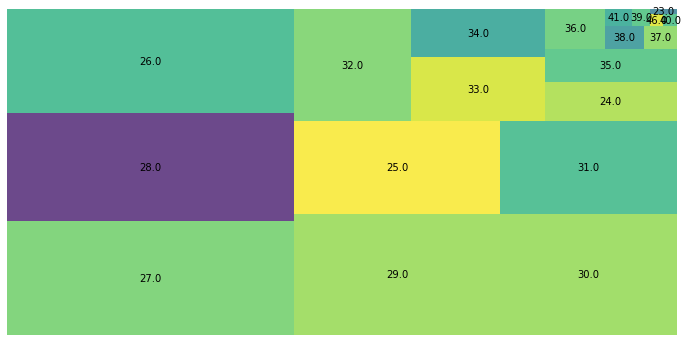

In [34]:
plt.figure(figsize=(12, 6))
sizes=list(age_count['count'].values)
label=list(age_count['age'].values)
squarify.plot(sizes=sizes, label=label, alpha=0.8)
plt.axis('off')
plt.show()

**4A.2 - Top 10 College name**

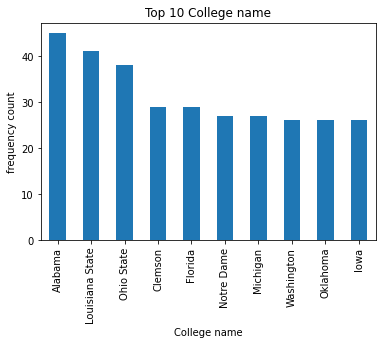

In [35]:
plt.title('Top 10 College name')
df_players['collegeName'].value_counts()[:10].plot(kind='bar') #top 10
plt.xlabel('College name')
plt.ylabel('frequency count');

**4A.3 - Top 10 official positions**

In [36]:
ofp_count = df_players['officialPosition'].value_counts().reset_index().rename(columns={'index':'officialPosition', 'officialPosition':'count'})

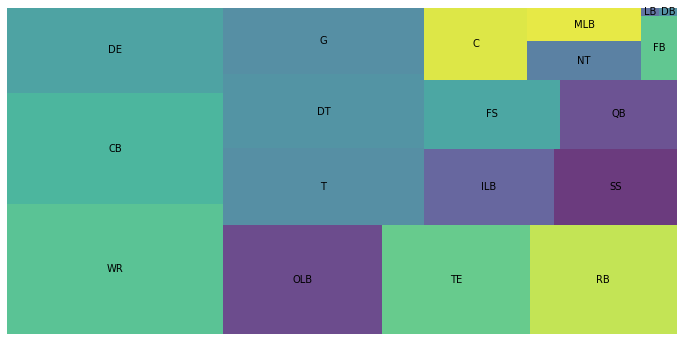

In [37]:
plt.figure(figsize=(12, 6))
sizes=list(ofp_count['count'].values)
label=list(ofp_count['officialPosition'].values)
squarify.plot(sizes=sizes, label=label, alpha=0.8)
plt.axis('off')
plt.show()

In [38]:
# Above is the list of top 10 most common official positions
# WR is the most common, followed by CB, DE, OLB, and RB.

We can also do plt

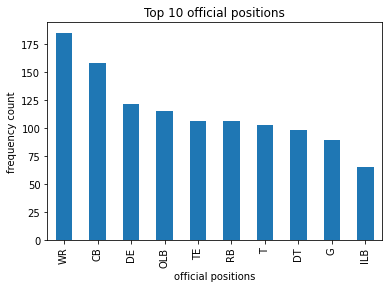

In [39]:
plt.title('Top 10 official positions')
df_players['officialPosition'].value_counts()[:10].plot(kind='bar') #top 10
plt.xlabel('official positions')
plt.ylabel('frequency count');

**4A.4 - Most common player heights**

In [40]:
height_count = df_players['height'].value_counts().reset_index().rename(columns={'index':'height', 'height':'count'})

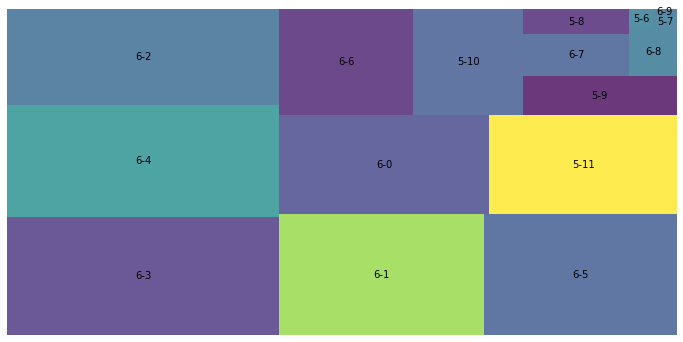

In [41]:
plt.figure(figsize=(12, 6))
sizes=list(height_count['count'].values)
label=list(height_count['height'].values)
squarify.plot(sizes=sizes, label=label, alpha=0.8)
plt.axis('off')
plt.show()

**4A.5 - Most common player weight**

In [42]:
weight_count = df_players['weight'].value_counts().reset_index().rename(columns={'index':'weight', 'weight':'count'})

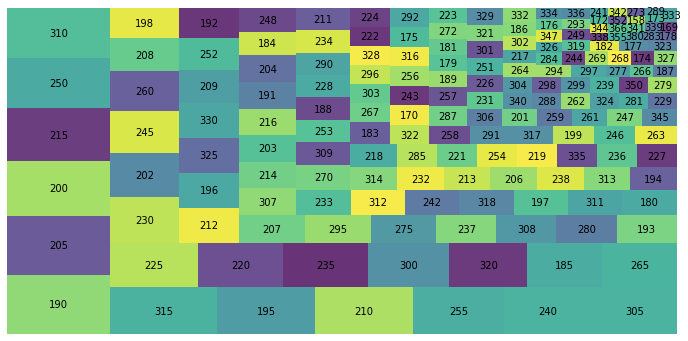

In [43]:
plt.figure(figsize=(12, 6))
sizes=list(weight_count['count'].values)
label=list(weight_count['weight'].values)
squarify.plot(sizes=sizes, label=label, alpha=0.8)
plt.axis('off')
plt.show()

In [44]:
df_players['weight'].describe()

count    1442.000000
mean      246.579750
std        47.177719
min       158.000000
25%       205.000000
50%       237.000000
75%       293.000000
max       380.000000
Name: weight, dtype: float64

In [45]:
df_players['height'].describe()

count     1442
unique      16
top        6-3
freq       212
Name: height, dtype: object

**Part 5B - Is there a correlation between officialPosition and age, height, weight, collegeName?**

**4B.1 - Check correlation between Age and officialPosition**

In [46]:
df_players['age'].corr(df_players["weight"])

0.12050241592095388

In [47]:
player_age = df_players[df_players['age'] != 0.0][['weight','age']]

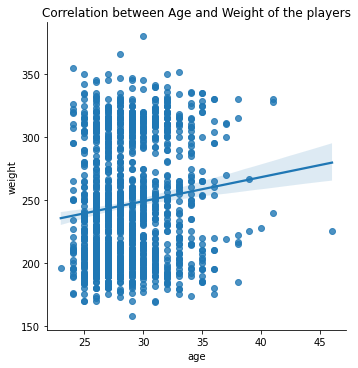

In [48]:
sns.lmplot(x="age", y="weight", data=player_age)
plt.title('Correlation between Age and Weight of the players');

> We cannot observe a linear pattern beween the 2 features.

**4B.2 - Check correlation between Age and officialPosition**

In [49]:
contigency = pd.crosstab(df_players['officialPosition'], df_players['height'])

In [50]:
from scipy.stats import chi2_contingency
  
# defining the table
data = contigency
stat, p, dof, expected = chi2_contingency(contigency)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.6418702901530457e-193
Dependent (reject H0)


> Therefore, we accept H1, that is, the variables have a significant relation.

In [51]:
contigency = pd.crosstab(df_players['officialPosition'], df_players['age'])

In [52]:
from scipy.stats import chi2_contingency
  
# defining the table
data = contigency
stat, p, dof, expected = chi2_contingency(contigency)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.6860509867153663e-05
Dependent (reject H0)


> no relationship between age and officialPosition

In [53]:
df_players['age'].corr(df_players['weight'])


0.12050241592095388

# **Basic Statistics**

**Correlations**

In [54]:
# correlation matrix

In [55]:
# Corelation matrix of numerical categories
(df_players[['nflId', 
           'age', 
           'weight']]
           .corr())

,nflId,age,weight
nflId,1.000000,-0.914530,-0.084488
age,-0.914530,1.000000,0.120502
weight,-0.084488,0.120502,1.000000


Text(0.5, 1.0, 'Heatmap for correlation between columns of players dataframe')

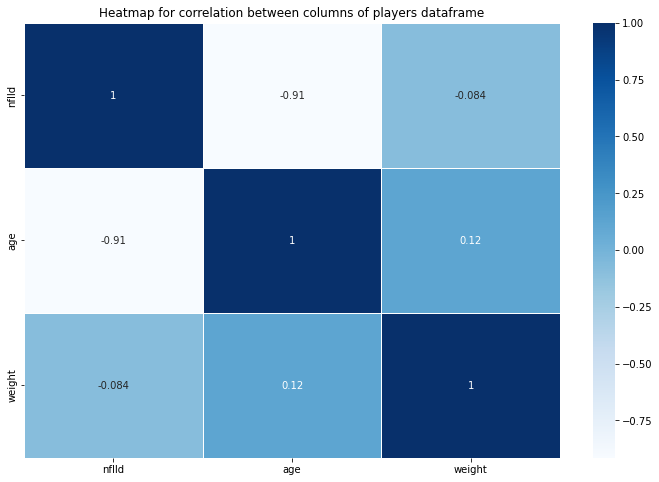

In [56]:
# Heatmap of correlation matrix for  players dataframe columns

fig, ax = plt.subplots(figsize=(12,8)) 

sns.heatmap((df_players[['nflId', 
           'age', 
           'weight']]
           .corr()),
                       linewidths=1,
                       cmap=plt.cm.Blues, 
                       annot=True,
                       ax=ax)

plt.title('Heatmap for correlation between columns of players dataframe')

# Step 5: Insights summary and conclusion

* Top 3 colleges are Alabama, Louisiana State, and Ohio State.
* Top 3 most common age of players are 28 
* Top 3 official positions are WR, CB and DE. 
* Top 3 most common heights are 6-3, 6-4 and 6-2. 
* The average weight are closely 246 pounds. 75% are 293 pounds. 
* There is no correlation between age and weight or age and official position.

Conclusion: Generally most of players are generally high and buff pariticipating in the games. Most of them are pretty young at the age of 28 so age is one of the factors you might need to consider when signing up to compete in the game. There is no correlation found between physical traits and official position when using the players.csv alone. Further exploration could be done on other datasets to explore the correlation of, for example, physical traits (height, weight) and maybe age on the speed or the position of the players. 
